In [78]:
#Import required packages
import PySimpleGUI as sg
import pandas as pd
import numpy as np
import yfinance as yf 

# optimum portfolio
import matplotlib.pyplot as plt
from pypfopt import plotting
from pypfopt import EfficientFrontier
from pypfopt.efficient_frontier import EfficientFrontier 
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

#Interest rate packages
import requests
import quandl




In [79]:
#Declare variables
investment_amount = float()

stock1_value = float()
stock1_name = str()
stock2_value = float()
stock2_name = str()
stock3_value = float()
stock3_name = str()
stock4_value = float()
stock4_name = str()
stock5_value = float()
stock5_name = str()
stock6_value = float()
stock6_name = str()
stock7_value = float()
stock7_name = str()
stock8_value = float()
stock8_name = str()
stock9_value = float()
stock9_name = str()
stock10_value = float()
stock10_name = str()
stock11_value = float()
stock11_name = str()
stock12_value = float()
stock12_name = str()
stock13_value = float()
stock14_name = str()
stock14_value = float()
stock15_name = str()
stock15_value = float()
stock16_name = str()
stock16_value = float()
stock17_name = str()
stock17_value = float()
stock18_name = str()
stock18_value = float()
stock19_name = str()
stock19_value = float()
stock20_name = str()
stock20_value = float()

check_value = float()
counta = 0

In [83]:
#Create User GUI with pysimplegui package
sg.theme('Material2')   # Other colours can be found in https://preview.redd.it/otneabe3zbz31.png?width=2305&format=png&auto=webp&s=7fdcf387d843f822892c724e0c6e73db038aec3d

# Layout in window
layout_tab_1 = [  [sg.Text('Stock 1 Code'),sg.InputText(size=(5,1), key='-stock_1-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 1'), sg.Slider(range=(0.00,100.00), orientation='h', size=(25,20), key='-stock_1_val')],
            #[sg.Text('Weighting of Stock 1'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_1_val')], #resolution = 0.1 for decimals
            [sg.Text('Stock 2 Code'),sg.InputText(size=(5,1), key='-stock_2-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 2'), sg.Slider(range=(0.00,100.00), orientation='h', size=(25,20), key='-stock_2_val')],
            [sg.Text('Stock 3 Code'),sg.InputText(size=(5,1), key='-stock_3-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 3'), sg.Slider(range=(0.00,100.00), orientation='h', size=(25,20), key='-stock_3_val')],
            [sg.Text('Stock 4 Code'),sg.InputText(size=(5,1), key='-stock_4-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 4'), sg.Slider(range=(0.00,100.00), orientation='h', size=(25,20), key='-stock_4_val')],
            [sg.Text('Stock 5 Code'),sg.InputText(size=(5,1), key='-stock_5-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 5'), sg.Slider(range=(0.00,100.00), orientation='h', size=(25,20), key='-stock_5_val')],
            [sg.Text('Stock 6 Code'),sg.InputText(size=(5,1), key='-stock_6-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 6'), sg.Slider(range=(0.00,100.00), orientation='h', size=(25,20), key='-stock_6_val')],
            [sg.Text('Stock 7 Code'),sg.InputText(size=(5,1), key='-stock_7-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 7'), sg.Slider(range=(0.00,100.00), orientation='h', size=(25,20), key='-stock_7_val')],
            [sg.Text('Stock 8 Code'),sg.InputText(size=(5,1), key='-stock_8-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 8'), sg.Slider(range=(0.00,100.00), orientation='h', size=(25,20), key='-stock_8_val')],
            [sg.Text('Stock 9 Code'),sg.InputText(size=(5,1), key='-stock_9-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 9'), sg.Slider(range=(0.00,100.00), orientation='h', size=(25,20), key='-stock_9_val')],
            [sg.Text('Stock 10 Code'),sg.InputText(size=(5,1), key='-stock_10-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 10'), sg.Slider(range=(0.00,100.00), orientation='h', size=(25,20), key='-stock_10_val')]
          
         ]

layout_tab_2 = [  
            [sg.Text('Stock 11 Code'),sg.InputText(size=(5,1), key='-stock_11-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 11'), sg.Slider(range=(0.00,100.00), orientation='h', size=(25,20), key='-stock_11_val')],
            [sg.Text('Stock 12 Code'),sg.InputText(size=(5,1), key='-stock_12-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 12'), sg.Slider(range=(0.00,100.00), orientation='h', size=(25,20), key='-stock_12_val')],
            [sg.Text('Stock 13 Code'),sg.InputText(size=(5,1), key='-stock_13-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 13'), sg.Slider(range=(0.00,100.00), orientation='h', size=(25,20), key='-stock_13_val')],
            [sg.Text('Stock 14 Code'),sg.InputText(size=(5,1), key='-stock_14-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 14'), sg.Slider(range=(0.00,100.00), orientation='h', size=(25,20), key='-stock_14_val')],
            [sg.Text('Stock 15 Code'),sg.InputText(size=(5,1), key='-stock_15-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 15'), sg.Slider(range=(0.00,100.00), orientation='h', size=(25,20), key='-stock_15_val')],
            [sg.Text('Stock 16 Code'),sg.InputText(size=(5,1), key='-stock_16-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 16'), sg.Slider(range=(0.00,100.00), orientation='h', size=(25,20), key='-stock_16_val')],
            [sg.Text('Stock 17 Code'),sg.InputText(size=(5,1), key='-stock_17-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 17'), sg.Slider(range=(0.00,100.00), orientation='h', size=(25,20), key='-stock_17_val')],
            [sg.Text('Stock 18 Code'),sg.InputText(size=(5,1), key='-stock_18-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 18'), sg.Slider(range=(0.00,100.00), orientation='h', size=(25,20), key='-stock_18_val')],
            [sg.Text('Stock 19 Code'),sg.InputText(size=(5,1), key='-stock_19-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 19'), sg.Slider(range=(0.00,100.00), orientation='h', size=(25,20), key='-stock_19_val')],
            [sg.Text('Stock 20 Code'),sg.InputText(size=(5,1), key='-stock_20-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 20'), sg.Slider(range=(0.00,100.00), orientation='h', size=(25,20), key='-stock_20_val')],
         ]

layout_tab_3 = [[sg.Text('Investment Amount'),sg.InputText(size=(10,1), key='-invest_amt-')],
                [sg.Text('ASX top 20 stock codes are as per follow for reference:')],
                [sg.Text('         AMC, ANZ, BHP, BXB, CBA, CSL, GMG, IAG, MQG, NAB')],
                [sg.Text('         NCM, RIO, SCG, SUN, TLS, TCL, WES, WBC, WPL and WOW')]
        ]
#layout = [  [sg.TabGroup([[sg.Tab('First 10 Stocks', layout_tab_1, tooltip = 'inputs for first 10 stocks'), sg.Tab('Second 10 Stocks', layout_tab_2, tooltip = 'inputs for second 10 stocks')]],
#            [sg.Button('Ok'), sg.Button('Cancel')],
#            [sg.Button('Check Weighting to see if it is 100%'), sg.Txt(size=(8,1), key='-CHECK-')] 
#         ]
                         
#layout = [[sg.TabGroup([[sg.Tab('First 10 Stocks', layout_tab_1, tooltip = 'inputs for first 10 stocks'), sg.Tab('Second 10 Stocks', layout_tab_2)]], tooltip = 'inputs for second 10 stocks')],    
layout = [[sg.TabGroup([[sg.Tab('Investment Amount', layout_tab_3),sg.Tab('First 10 Stocks', layout_tab_1, tooltip = 'inputs for first 10 stocks'), sg.Tab('Second 10 Stocks', layout_tab_2)]], tooltip = 'inputs for second 10 stocks')],    
            [sg.Button('Ok'), sg.Button('Cancel')],
            [sg.Button('Check Weighting to see if it is 100%'), sg.Txt(size=(8,1), key='-CHECK-')] 
            
                       ]   
                         

# Create the Window
window = sg.Window('Window Title', layout)

# Event Loop to process "events" and get the "values" of the inputs
while True:
    event, values = window.read()

    
    
#loop to work out if weighting adds up to 100% or not 
    if event == 'Check Weighting to see if it is 100%':
        stock1_value =  float(values['-stock_1_val'])
        stock2_value =  float(values['-stock_2_val'])
        stock3_value =  float(values['-stock_3_val'])
        stock4_value =  float(values['-stock_4_val'])
        stock5_value =  float(values['-stock_5_val'])
        stock6_value =  float(values['-stock_6_val'])
        stock7_value =  float(values['-stock_7_val'])
        stock8_value =  float(values['-stock_8_val'])        
        stock9_value =  float(values['-stock_9_val'])
        stock10_value =  float(values['-stock_10_val'])
        stock11_value =  float(values['-stock_11_val'])
        stock12_value =  float(values['-stock_12_val'])
        stock13_value =  float(values['-stock_13_val'])
        stock14_value =  float(values['-stock_14_val'])
        stock15_value =  float(values['-stock_15_val'])
        stock16_value =  float(values['-stock_16_val'])        
        stock17_value =  float(values['-stock_17_val'])
        stock18_value =  float(values['-stock_18_val'])
        stock19_value =  float(values['-stock_19_val'])
        stock20_value =  float(values['-stock_20_val'])
        check_value = stock1_value + stock2_value + stock3_value + stock4_value + stock5_value + stock6_value + stock7_value + stock8_value + stock9_value + stock10_value + stock11_value + stock12_value + stock13_value + stock14_value + stock15_value + stock16_value + stock17_value + stock18_value + stock19_value + stock20_value
        window['-CHECK-'].update(check_value)

#loop to store value or display error message
    if event == 'Ok':
        
        #store values input
        investment_amount =  float(values['-invest_amt-'])
        stock1_value =  float(values['-stock_1_val'])
        stock1_name = str(values['-stock_1-']).upper()
        stock2_value =  float(values['-stock_2_val'])
        stock2_name = str(values['-stock_2-']).upper()
        stock3_value =  float(values['-stock_3_val'])
        stock3_name = str(values['-stock_3-']).upper()
        stock4_value =  float(values['-stock_4_val'])
        stock4_name = str(values['-stock_4-']).upper()
        stock5_value =  float(values['-stock_5_val'])
        stock5_name = str(values['-stock_5-']).upper()
        stock6_value =  float(values['-stock_6_val'])
        stock6_name = str(values['-stock_6-']).upper()
        stock7_value =  float(values['-stock_7_val'])
        stock7_name = str(values['-stock_7-']).upper()
        stock8_value =  float(values['-stock_8_val'])
        stock8_name = str(values['-stock_8-']).upper()
        stock9_value =  float(values['-stock_9_val'])
        stock9_name = str(values['-stock_9-']).upper()
        stock10_value =  float(values['-stock_10_val'])
        stock10_name = str(values['-stock_10-']).upper()
        stock11_value =  float(values['-stock_11_val'])
        stock11_name = str(values['-stock_11-']).upper()
        stock12_value =  float(values['-stock_12_val'])
        stock12_name = str(values['-stock_12-']).upper()
        stock13_value =  float(values['-stock_13_val'])
        stock13_name = str(values['-stock_13-']).upper()
        stock14_value =  float(values['-stock_14_val'])
        stock14_name = str(values['-stock_14-']).upper()
        stock15_value =  float(values['-stock_15_val'])
        stock15_name = str(values['-stock_15-']).upper()
        stock16_value =  float(values['-stock_16_val'])
        stock16_name = str(values['-stock_16-']).upper()
        stock17_value =  float(values['-stock_17_val'])
        stock17_name = str(values['-stock_17-']).upper()
        stock18_value =  float(values['-stock_18_val'])
        stock18_name = str(values['-stock_18-']).upper()
        stock19_value =  float(values['-stock_19_val'])
        stock19_name = str(values['-stock_19-']).upper()
        stock20_value =  float(values['-stock_20_val'])
        stock20_name = str(values['-stock_20-']).upper()
        check_value = stock1_value + stock2_value + stock3_value + stock4_value + stock5_value + stock6_value + stock7_value + stock8_value + stock9_value + stock10_value + stock11_value + stock12_value + stock13_value + stock14_value + stock15_value + stock16_value + stock17_value + stock18_value + stock19_value + stock20_value
        #if statement to check if values input equals 100%
        if check_value  == 100:
            #check if stock input is 3 characters or not
            if len(stock1_name) != 3 and stock1_value != 0:
                sg.popup(f'Stock One Input {stock1_name} is not 3 letters')
            elif len(stock2_name) != 3 and stock2_value != 0:
                sg.popup(f'Stock Two Input {stock2_name} is not 3 letters')
            elif len(stock3_name) != 3 and stock3_value != 0:
                sg.popup(f'Stock Three Input {stock3_name} is not 3 letters')            
            elif len(stock4_name) != 3 and stock4_value != 0:
                sg.popup(f'Stock Four Input {stock4_name} is not 3 letters')     
            elif len(stock5_name) != 3 and stock5_value != 0:
                sg.popup(f'Stock Five Input {stock5_name} is not 3 letters')     
            elif len(stock6_name) != 3 and stock6_value != 0:
                sg.popup(f'Stock Six Input {stock6_name} is not 3 letters')     
            elif len(stock7_name) != 3 and stock7_value != 0:
                sg.popup(f'Stock Seven Input {stock7_name} is not 3 letters')     
            elif len(stock8_name) != 3 and stock8_value != 0:
                sg.popup(f'Stock Eight Input {stock8_name} is not 3 letters')     
            elif len(stock9_name) != 3 and stock9_value != 0:
                sg.popup(f'Stock Nine Input {stock9_name} is not 3 letters')     
            elif len(stock10_name) != 3 and stock10_value != 0:
                sg.popup(f'Stock Ten Input {stock10_name} is not 3 letters')            
            elif len(stock11_name) != 3 and stock11_value != 0:
                sg.popup(f'Stock 11 Input {stock11_name} is not 3 letters')     
            elif len(stock12_name) != 3 and stock12_value != 0:
                sg.popup(f'Stock 12 Input {stock12_name} is not 3 letters')     
            elif len(stock13_name) != 3 and stock13_value != 0:
                sg.popup(f'Stock 13 Input {stock13_name} is not 3 letters')     
            elif len(stock14_name) != 3 and stock14_value != 0:
                sg.popup(f'Stock 14 Input {stock14_name} is not 3 letters')     
            elif len(stock15_name) != 3 and stock15_value != 0:
                sg.popup(f'Stock 15 Input {stock15_name} is not 3 letters')     
            elif len(stock16_name) != 3 and stock16_value != 0:
                sg.popup(f'Stock 16 Input {stock16_name} is not 3 letters')    
            elif len(stock17_name) != 3 and stock17_value != 0:
                sg.popup(f'Stock 17 Input {stock17_name} is not 3 letters')            
            elif len(stock18_name) != 3 and stock18_value != 0:
                sg.popup(f'Stock 18 Input {stock18_name} is not 3 letters')     
            elif len(stock19_name) != 3 and stock19_value != 0:
                sg.popup(f'Stock 19 Input {stock19_name} is not 3 letters')     
            elif len(stock20_name) != 3 and stock20_value != 0:
                sg.popup(f'Stock 20 Input {stock20_name} is not 3 letters')                 
                
                
            #if total weighting is 100% and stock inputs are 3 characters, then print this
            else:            
                sg.popup(f'Data received, program will now continue to run')
                break
        #if stock names are 3 characters but does not add up to 100% then print this
        else:
            sg.popup(f'Weighting of Stocks does not equal 100, it is currently {check_value}')

#loop for cancel button of close window
    if event == sg.WIN_CLOSED or event == 'Cancel': # if user closes window or clicks cancel
        break

window.close()


In [4]:
#code commented out as used for diagnosis

#print(f'{stock1_name} at {stock1_value}')
#print(f'{stock2_name} at {stock2_value}')
#print(f'{stock3_name} at {stock3_value}')
#print(f'{stock4_name} at {stock4_value}')
#print(f'{stock5_name} at {stock5_value}')
#print(f'{stock6_name} at {stock6_value}')
#print(f'{stock7_name} at {stock7_value}')
#print(f'{stock8_name} at {stock8_value}')
#print(f'{stock9_name} at {stock9_value}')
#print(f'{stock10_name} at {stock10_value}')
#print(f'{stock11_name} at {stock11_value}')
#print(f'{stock12_name} at {stock12_value}')
#print(f'{stock13_name} at {stock13_value}')
#print(f'{stock14_name} at {stock14_value}')
#print(f'{stock15_name} at {stock15_value}')
#print(f'{stock16_name} at {stock16_value}')
#print(f'{stock17_name} at {stock17_value}')
#print(f'{stock18_name} at {stock18_value}')
#print(f'{stock19_name} at {stock19_value}')
#print(f'{stock20_name} at {stock20_value}')
#print(f'{investment_amount}')

In [5]:
#set blank column, index and values
blank_column_names = ["BLANK"]
blank_index_name = ['Date']
blank_index_values = pd.date_range(start='1/1/2011', end='1/01/2021', freq='D')

#obtain stock data from yahoo finance package, data clean and if user input is blank, create blank column of data
if stock1_value > 0:

    stock1_string = stock1_name + '.AX'
    stock1 = yf.Ticker(stock1_string)

    # get historical market data
    df_stock1 = stock1.history(start = '2011-1-1', end='2021-1-1')
    df_stock1.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock1_return = df_stock1.pct_change().dropna().copy()
    df_stock1_prices = df_stock1.dropna().rename(columns={"Close":stock1_name}).copy()
    df_stock1_return.rename(columns={"Close":stock1_name}, inplace=True)

else:
    
    df_stock1_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock1_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)

In [6]:
#obtain stock data from yahoo finance package, data clean and if user input is blank, create blank column of data
if stock2_value > 0:

    stock2_string = stock2_name + '.AX'
    stock2 = yf.Ticker(stock2_string)

    # get historical market data
    df_stock2 = stock2.history(start = '2011-1-1', end='2021-1-1')
    df_stock2.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock2_return = df_stock2.pct_change().dropna().copy()
    df_stock2_prices = df_stock2.dropna().rename(columns={"Close":stock2_name}).copy()
    df_stock2_return.rename(columns={"Close":stock2_name}, inplace=True)

else:
    
    df_stock2_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock2_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)

In [7]:
#obtain stock data from yahoo finance package, data clean and if user input is blank, create blank column of data
if stock3_value > 0:

    stock3_string = stock3_name + '.AX'
    stock3 = yf.Ticker(stock3_string)

    # get historical market data
    df_stock3 = stock3.history(start = '2011-1-1', end='2021-1-1')
    df_stock3.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock3_return = df_stock3.pct_change().dropna().copy()
    df_stock3_prices = df_stock3.dropna().rename(columns={"Close":stock3_name}).copy()
    df_stock3_return.rename(columns={"Close":stock3_name}, inplace=True)

else:
    
    df_stock3_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock3_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
#df_stock3_return.head()

In [8]:
#obtain stock data from yahoo finance package, data clean and if user input is blank, create blank column of data
if stock4_value > 0:

    stock4_string = stock4_name + '.AX'
    stock4 = yf.Ticker(stock4_string)

    # get historical market data
    df_stock4 = stock4.history(start = '2011-1-1', end='2021-1-1')
    df_stock4.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock4_return = df_stock4.pct_change().dropna().copy()
    df_stock4_prices = df_stock4.dropna().rename(columns={"Close":stock4_name}).copy()
    df_stock4_return.rename(columns={"Close":stock4_name}, inplace=True)

else:
    
    df_stock4_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock4_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
#df_stock4_return.head()

In [9]:
#obtain stock data from yahoo finance package, data clean and if user input is blank, create blank column of data
if stock5_value > 0:

    stock5_string = stock5_name + '.AX'
    stock5 = yf.Ticker(stock5_string)

    # get historical market data
    df_stock5 = stock5.history(start = '2011-1-1', end='2021-1-1')
    df_stock5.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock5_return = df_stock5.pct_change().dropna().copy()
    df_stock5_prices = df_stock5.dropna().rename(columns={"Close":stock5_name}).copy()
    df_stock5_return.rename(columns={"Close":stock5_name}, inplace=True)

else:
    
    df_stock5_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock5_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
#df_stock5_return.head()

In [10]:
#obtain stock data from yahoo finance package, data clean and if user input is blank, create blank column of data
if stock6_value > 0:

    stock6_string = stock6_name + '.AX'
    stock6 = yf.Ticker(stock6_string)

    # get historical market data
    df_stock6 = stock6.history(start = '2011-1-1', end='2021-1-1')
    df_stock6.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock6_return = df_stock6.pct_change().dropna().copy()
    df_stock6_prices = df_stock6.dropna().rename(columns={"Close":stock6_name}).copy()
    df_stock6_return.rename(columns={"Close":stock6_name}, inplace=True)

else:
    
    df_stock6_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock6_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
#df_stock6_return.head()


In [11]:
#obtain stock data from yahoo finance package, data clean and if user input is blank, create blank column of data
if stock7_value > 0:

    stock7_string = stock7_name + '.AX'
    stock7 = yf.Ticker(stock7_string)

    # get historical market data
    df_stock7 = stock7.history(start = '2011-1-1', end='2021-1-1')
    df_stock7.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock7_return = df_stock7.pct_change().dropna().copy()
    df_stock7_prices = df_stock7.dropna().rename(columns={"Close":stock7_name}).copy()
    df_stock7_return.rename(columns={"Close":stock7_name}, inplace=True)

else:
    
    df_stock7_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock7_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
#df_stock7_return.head()


In [12]:
#obtain stock data from yahoo finance package, data clean and if user input is blank, create blank column of data
if stock8_value > 0:

    stock8_string = stock8_name + '.AX'
    stock8 = yf.Ticker(stock8_string)

    # get historical market data
    df_stock8 = stock8.history(start = '2011-1-1', end='2021-1-1')
    df_stock8.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock8_return = df_stock8.pct_change().dropna().copy()
    df_stock8_prices = df_stock8.dropna().rename(columns={"Close":stock8_name}).copy()
    df_stock8_return.rename(columns={"Close":stock8_name}, inplace=True)

else:
    
    df_stock8_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock8_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
#df_stock8_return.head()


In [13]:
#obtain stock data from yahoo finance package, data clean and if user input is blank, create blank column of data
if stock9_value > 0:

    stock9_string = stock9_name + '.AX'
    stock9 = yf.Ticker(stock9_string)

    # get historical market data
    df_stock9 = stock9.history(start = '2011-1-1', end='2021-1-1')
    df_stock9.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock9_return = df_stock9.pct_change().dropna().copy()
    df_stock9_prices = df_stock9.dropna().rename(columns={"Close":stock9_name}).copy()
    df_stock9_return.rename(columns={"Close":stock9_name}, inplace=True)

else:
    
    df_stock9_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock9_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
#df_stock9_return.head()


In [14]:
#obtain stock data from yahoo finance package, data clean and if user input is blank, create blank column of data
if stock10_value > 0:

    stock10_string = stock10_name + '.AX'
    stock10 = yf.Ticker(stock10_string)

    # get historical market data
    df_stock10 = stock10.history(start = '2011-1-1', end='2021-1-1')
    df_stock10.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock10_return = df_stock10.pct_change().dropna().copy()
    df_stock10_prices = df_stock10.dropna().rename(columns={"Close":stock10_name}).copy()
    df_stock10_return.rename(columns={"Close":stock10_name}, inplace=True)

else:
    
    df_stock10_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock10_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
#df_stock10_return.head()


In [15]:
#obtain stock data from yahoo finance package, data clean and if user input is blank, create blank column of data
if stock11_value > 0:

    stock11_string = stock11_name + '.AX'
    stock11 = yf.Ticker(stock11_string)

    # get historical market data
    df_stock11 = stock11.history(start = '2011-1-1', end='2021-1-1')
    df_stock11.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock11_return = df_stock11.pct_change().dropna().copy()
    df_stock11_prices = df_stock11.dropna().rename(columns={"Close":stock11_name}).copy()
    df_stock11_return.rename(columns={"Close":stock11_name}, inplace=True)

else:
    
    df_stock11_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock11_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
#df_stock11_return.head()


In [16]:
#obtain stock data from yahoo finance package, data clean and if user input is blank, create blank column of data
if stock12_value > 0:

    stock12_string = stock12_name + '.AX'
    stock12 = yf.Ticker(stock12_string)

    # get historical market data
    df_stock12 = stock12.history(start = '2011-1-1', end='2021-1-1')
    df_stock12.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock12_return = df_stock12.pct_change().dropna().copy()
    df_stock12_prices = df_stock12.dropna().rename(columns={"Close":stock12_name}).copy()
    df_stock12_return.rename(columns={"Close":stock12_name}, inplace=True)

else:
    
    df_stock12_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock12_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
#df_stock12_return.head()


In [17]:
#obtain stock data from yahoo finance package, data clean and if user input is blank, create blank column of data
if stock13_value > 0:

    stock13_string = stock13_name + '.AX'
    stock13 = yf.Ticker(stock13_string)

    # get historical market data
    df_stock13 = stock13.history(start = '2011-1-1', end='2021-1-1')
    df_stock13.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock13_return = df_stock13.pct_change().dropna().copy()
    df_stock13_prices = df_stock13.dropna().rename(columns={"Close":stock13_name}).copy()
    df_stock13_return.rename(columns={"Close":stock13_name}, inplace=True)

else:
    
    df_stock13_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock13_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
#df_stock13_return.head()


In [18]:
#obtain stock data from yahoo finance package, data clean and if user input is blank, create blank column of data
if stock14_value > 0:

    stock14_string = stock14_name + '.AX'
    stock14 = yf.Ticker(stock14_string)

    # get historical market data
    df_stock14 = stock14.history(start = '2011-1-1', end='2021-1-1')
    df_stock14.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock14_return = df_stock14.pct_change().dropna().copy()
    df_stock14_prices = df_stock14.dropna().rename(columns={"Close":stock14_name}).copy()
    df_stock14_return.rename(columns={"Close":stock14_name}, inplace=True)

else:
    
    df_stock14_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock14_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
#df_stock14_return.head()


In [19]:
#obtain stock data from yahoo finance package, data clean and if user input is blank, create blank column of data
if stock15_value > 0:

    stock15_string = stock15_name + '.AX'
    stock15 = yf.Ticker(stock15_string)

    # get historical market data
    df_stock15 = stock15.history(start = '2011-1-1', end='2021-1-1')
    df_stock15.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock15_return = df_stock15.pct_change().dropna().copy()
    df_stock15_prices = df_stock15.dropna().rename(columns={"Close":stock15_name}).copy()
    df_stock15_return.rename(columns={"Close":stock15_name}, inplace=True)

else:
    
    df_stock15_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock15_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
#df_stock15_return.head()


In [20]:
#obtain stock data from yahoo finance package, data clean and if user input is blank, create blank column of data
if stock16_value > 0:

    stock16_string = stock16_name + '.AX'
    stock16 = yf.Ticker(stock16_string)

    # get historical market data
    df_stock16 = stock16.history(start = '2011-1-1', end='2021-1-1')
    df_stock16.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock16_return = df_stock16.pct_change().dropna().copy()
    df_stock16_prices = df_stock16.dropna().rename(columns={"Close":stock16_name}).copy()
    df_stock16_return.rename(columns={"Close":stock16_name}, inplace=True)

else:
    
    df_stock16_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock16_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
#df_stock16_return.head()


In [21]:
#obtain stock data from yahoo finance package, data clean and if user input is blank, create blank column of data
if stock17_value > 0:

    stock17_string = stock17_name + '.AX'
    stock17 = yf.Ticker(stock17_string)

    # get historical market data
    df_stock17 = stock17.history(start = '2011-1-1', end='2021-1-1')
    df_stock17.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock17_return = df_stock17.pct_change().dropna().copy()
    df_stock17_prices = df_stock17.dropna().rename(columns={"Close":stock17_name}).copy()
    df_stock17_return.rename(columns={"Close":stock17_name}, inplace=True)

else:
    
    df_stock17_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock17_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
#df_stock17_return.head()


In [22]:
#obtain stock data from yahoo finance package, data clean and if user input is blank, create blank column of data
if stock18_value > 0:

    stock18_string = stock18_name + '.AX'
    stock18 = yf.Ticker(stock18_string)

    # get historical market data
    df_stock18 = stock18.history(start = '2011-1-1', end='2021-1-1')
    df_stock18.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock18_return = df_stock18.pct_change().dropna().copy()
    df_stock18_prices = df_stock18.dropna().rename(columns={"Close":stock18_name}).copy()
    df_stock18_return.rename(columns={"Close":stock18_name}, inplace=True)

else:
    
    df_stock18_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock18_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
#df_stock18_return.head()


In [23]:
#obtain stock data from yahoo finance package, data clean and if user input is blank, create blank column of data
if stock19_value > 0:

    stock19_string = stock19_name + '.AX'
    stock19 = yf.Ticker(stock19_string)

    # get historical market data
    df_stock19 = stock19.history(start = '2011-1-1', end='2021-1-1')
    df_stock19.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock19_return = df_stock19.pct_change().dropna().copy()
    df_stock19_prices = df_stock19.dropna().rename(columns={"Close":stock19_name}).copy()
    df_stock19_return.rename(columns={"Close":stock19_name}, inplace=True)

else:
    
    df_stock19_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock19_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
#df_stock19_return.head()


In [24]:
#obtain stock data from yahoo finance package, data clean and if user input is blank, create blank column of data
if stock20_value > 0:

    stock20_string = stock20_name + '.AX'
    stock20 = yf.Ticker(stock20_string)

    # get historical market data
    df_stock20 = stock20.history(start = '2011-1-1', end='2021-1-1')
    df_stock20.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock20_return = df_stock20.pct_change().dropna().copy()
    df_stock20_prices = df_stock20.dropna().rename(columns={"Close":stock20_name}).copy()
    df_stock20_return.rename(columns={"Close":stock20_name}, inplace=True)

else:
    
    df_stock20_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock20_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
#df_stock20_return.head()


In [25]:
#Combine stock data
Portfolio = pd.concat([df_stock1_return, df_stock2_return, df_stock3_return, df_stock4_return, df_stock5_return,
                        df_stock6_return, df_stock7_return, df_stock8_return, df_stock9_return, df_stock10_return,
                        df_stock11_return, df_stock12_return, df_stock13_return, df_stock14_return, df_stock15_return,
                        df_stock16_return, df_stock17_return, df_stock18_return, df_stock19_return, df_stock20_return
                      ], axis="columns", join="inner").fillna(0)
Portfolio.index.name = 'Date'

In [26]:
#Portfolio.head()

In [27]:
#obtain stock weights and name from user inputs
user_weights = [stock1_value/100, stock2_value/100, stock3_value/100, stock4_value/100, stock5_value/100,
          stock6_value/100, stock7_value/100, stock8_value/100, stock9_value/100, stock10_value/100,
          stock11_value/100, stock12_value/100, stock13_value/100, stock14_value/100, stock15_value/100,
          stock16_value/100, stock17_value/100, stock18_value/100, stock19_value/100, stock20_value/100
          ]
stock_name = [stock1_name, stock2_name, stock3_name, stock4_name, stock5_name,
          stock6_name, stock7_name, stock8_name, stock9_name, stock10_name,
          stock11_name, stock12_name, stock13_name, stock14_name, stock15_name,
          stock16_name, stock17_name, stock18_name, stock19_name, stock20_name
          ]

In [28]:
#calculate returns
portfolio_returns = Portfolio.dot(user_weights)
#portfolio_returns.head()

In [29]:
portfolio_cum_returns = (portfolio_returns + 1).cumprod()

In [30]:
#portfolio_cum_returns.plot()

In [31]:
#portfolio_cum_returns.tail()

In [32]:
investment_worth = portfolio_cum_returns * investment_amount
final_investment_worth = investment_worth.iloc[-1]

In [33]:
#final_investment_worth


In [34]:
# Calaculate the portfolio variance
cov_matrix_annual = Portfolio.cov()* 252
cov_matrix_annual

#Calaculate the portfolio variance
port_variance = np.dot(user_weights, np.dot(cov_matrix_annual, user_weights))
port_variance

#Calaculate the portfolio volatility (risk)
port_volatility = np.sqrt(port_variance)
port_volatility

#Calaculate the annual portfolio return
portfolio_simple_annual_return = np.sum(Portfolio.mean()*user_weights)*252
portfolio_simple_annual_return

# show the expected annual return, volatility(risk), and variance 

percent_var = str(round(port_variance, 2)*100)+'%'
percent_vola = str(round(port_volatility, 2)*100)+'%'
percent_ret = str(round(portfolio_simple_annual_return, 2)*100)+'%'

print('User Input Expected annual return:' +percent_ret)
print('User Input Annual volatility/risk:'+percent_vola)
print('User Input Annual variance:' + percent_var)

User Input Expected annual return:12.0%
User Input Annual volatility/risk:18.0%
User Input Annual variance:3.0%


# Optimum Portfolio Analysis  

In [35]:
#Set dataframe to be used for optimum portfolio analysis
Portfolio2 = pd.concat([df_stock1_prices, df_stock2_prices, df_stock3_prices, df_stock4_prices, df_stock5_prices,
                        df_stock6_prices, df_stock7_prices, df_stock8_prices, df_stock9_prices, df_stock10_prices,
                        df_stock11_prices, df_stock12_prices, df_stock13_prices, df_stock14_prices, df_stock15_prices,
                        df_stock16_prices, df_stock17_prices, df_stock18_prices, df_stock19_prices, df_stock20_prices
                      ], axis="columns", join="inner").fillna(0)
Portfolio2.index.name = 'Date'
#Portfolio2

In [36]:
# cleaning data
optimised_portfolio_df = Portfolio2.drop(['BLANK'], axis=1).dropna().copy()
#optimised_portfolio_df.head()

In [37]:
# Optimize the portfolio 
# Using pyportfolioOpt package (pip install pyportfolio)

# Caluculate the expected anualized returns and sample covariance

mu = expected_returns.mean_historical_return(optimised_portfolio_df)   #Average ecpected return base on the historical data 
S = risk_models.sample_cov(optimised_portfolio_df)                     #Sample covariance 


# Optimized for maximun sharpe ratio 
ef = EfficientFrontier(mu, S)   #create the Efficient Frontier Object

weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()  # cleaning data 
print(cleaned_weights)

ef.portfolio_performance(verbose=True)

OrderedDict([('ANZ', 0.0), ('CBA', 0.1365), ('WES', 0.8635), ('WOW', 0.0)])
Expected annual return: 13.9%
Annual volatility: 18.6%
Sharpe Ratio: 0.64


(0.13934579271832542, 0.18610321661864002, 0.6412881780699528)

In [38]:
# Assets Allocation
# pip install pulp
# pip install cvxopt (solver GLPK_MI for assets allocation)

# Get the discrete allocation of each share per share per stock 
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

initial_investment = investment_amount
latest_prices = get_latest_prices(optimised_portfolio_df)
weights_optimised = cleaned_weights 

da = DiscreteAllocation(weights_optimised, latest_prices, total_portfolio_value = initial_investment)
allocation, leftover = da.lp_portfolio()
print('Discrete allocation', allocation)
print('Funds Remaining: $' , leftover)

Discrete allocation {'CBA': 17, 'WES': 174}
Funds Remaining: $ 5.420845031738281


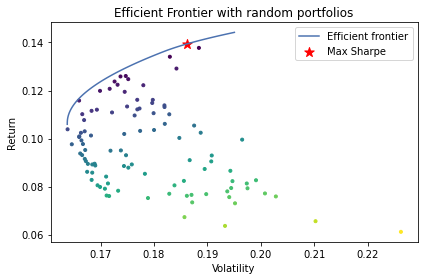

In [39]:
#pip install cvxpy (solver)


# Plotting Efficient Frontier

mu = expected_returns.mean_historical_return(optimised_portfolio_df)   #Average ecpected return base on the historical data 
S = risk_models.sample_cov(optimised_portfolio_df)                     #Sample covariance 


ef = EfficientFrontier(mu, S)     #Efficient Frontier Object 
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 100
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png",dpi=200)
plt.show()

In [40]:
type(weights_optimised)
weights_optimised_list = list(weights_optimised.values())
#print(weights_optimised_list)

In [41]:
#calcualte returns from optimised portfolio
optimised_portfolio_daily_returns = optimised_portfolio_df.pct_change()

optimised_portfolio_returns = optimised_portfolio_daily_returns.dot(weights_optimised_list)
#optimised_portfolio_returns.head()


In [45]:
optimised_cumulative_returns = (optimised_portfolio_returns + 1).cumprod()-1
#optimised_cumulative_returns.plot()

In [46]:
#optimised_cumulative_returns.tail()

In [47]:
#calculate investment worth at end of 10 years
investment_worth_p2 = optimised_cumulative_returns * investment_amount + investment_amount

p2_investment_worth = investment_worth_p2.iloc[-1]
#print(p2_investment_worth)

# Interest Rate Section

In [48]:
#obtain interest rate data from quandl
interestrate = quandl.get("RBA/F01_1", start_date="2011-01-01", end_date="2021-01-01")
#interestrate.tail()

#calculate month by month cash rate
month_by_month_cashrate = interestrate['Cash Rate Target. Units: Per cent; Series ID: FIRMMCRT']
month_by_month_cashrate_df = pd.DataFrame(month_by_month_cashrate)
month_by_month_cashrate_df.rename(columns = {'Cash Rate Target. Units: Per cent; Series ID: FIRMMCRT':'RBA_Rate'}, inplace = True)

#month_by_month_cashrate_df.tail(10)

In [49]:
month_by_month_cashrate_df.describe()

,RBA_Rate
count,120.000000
mean,2.196438
std,1.232845
min,0.100000
25%,1.500000
50%,2.000000
75%,2.750000
max,4.750000


In [50]:
# Program to calculate compound interest

# First calculate the compound interest for principal using formula: A = P (1 + r/n)**(nt)
# r = annual interest rate
# n = number of compounds per period (usually in months)
# t = time

def compundedinterest (interestrate_input):
	principal = investment_amount
	annualrate_pct = interestrate_input
	numberoftimescompounded = 12
	years = 10
	annualrate = (float(annualrate_pct))/100
	#print ("The principal entered is: ", principal)
	#print ("The annual rate in decimal form is: ", annualrate)
	#print ("The number of times it will be compounded per year is: ", numberoftimescompounded)
	#print ("The number of years it will be compounded: ", years)
	# calculate compound interest plus the principal
	preliminarynumber = (1 + (annualrate/numberoftimescompounded))
	raisedtopower = (numberoftimescompounded * years)
	totalamount = principal * (preliminarynumber**raisedtopower)
	#totalamount = round((totalamount,2))
	return totalamount

#print(f"{investment_amount} deposited in 10 years will equal to:")

Mean_Principal_plus_Interest = compundedinterest (month_by_month_cashrate_df.mean())
#print(f"   Using Historical Mean_Principal_plus_Interest: {Mean_Principal_plus_Interest}")

Min_Principal_plus_Interest = compundedinterest (month_by_month_cashrate_df.min())
#print(f"   Using MINIMUM_Principal_plus_Interest: {Min_Principal_plus_Interest}")

Max_Principal_plus_Interest = compundedinterest (month_by_month_cashrate_df.max())
#print(f"   Using MAXIMUM_Principal_plus_Interest: {Max_Principal_plus_Interest}")



In [51]:
#print(Mean_Principal_plus_Interest)
#print(final_investment_worth)

# Crypto Portfolio Analysis  

In [52]:
## Initial Imports --- MOVE THESE TO THE TOP
import datetime as dt 
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


%matplotlib inline

In [53]:
## Description

In [54]:
#This portfolio is to run a scenario, where the investor is focusing not only in stock investment, but also on crypto investment. 
#The analysis will run different scenarios, including: portfolio of crypto only, portfolio of crypto/ASX stocks mix
#The result will be used to compare its performance on traditional equity indices such as: ASX20, ASX200, ASX300; or index-tracking ETFs.



In [55]:
#Getting the Data for Crypto

In [56]:
#btc_returns_csv = Path(r"E:\OneDrive\Documents\GitHub\MonashFintech2021Project1\Financial Modelling\Crypto Portfolio\Resources\BTC-USD.csv")
#BTC_daily_returns = pd.read_csv(btc_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
#BTC_daily_returns.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], axis=1,inplace=True)
#BTC_daily_returns = BTC_daily_returns.rename(columns={"Adj Close":"BTC/USD"})
#BTC_daily_returns = BTC_daily_returns["2016-01-01":]



BTC = yf.Ticker("BTC-USD")

# get historical market data
df_BTC = BTC.history(start = '2016-1-1', end='2021-1-1')
df_BTC.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
BTC_daily_returns = df_BTC.pct_change()
BTC_daily_returns = BTC_daily_returns.rename(columns={"Close":"BTC/USD"})
BTC_daily_returns = BTC_daily_returns.dropna()
BTC_daily_returns

,BTC/USD
Date,
2016-01-01,0.008749
2016-01-02,-0.002063
2016-01-03,-0.007907
2016-01-04,0.007163
2016-01-05,-0.002611
...,...
2020-12-27,-0.006231
2020-12-28,0.030927
2020-12-29,0.010250


In [57]:
#eth_returns_csv = Path(r"E:\OneDrive\Documents\GitHub\MonashFintech2021Project1\Financial Modelling\Crypto Portfolio\Resources\ETH-USD.csv")
#ETH_daily_returns = pd.read_csv(eth_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
#ETH_daily_returns.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], axis=1,inplace=True)
#ETH_daily_returns = ETH_daily_returns.rename(columns={"Adj Close":"ETH/USD"})
#ETH_daily_returns = ETH_daily_returns["2016-01-01":]


ETH = yf.Ticker("ETH-USD")

# get historical market data
df_ETH = ETH.history(start = '2016-1-1', end='2021-1-1')
df_ETH.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
ETH_daily_returns = df_ETH.pct_change()
ETH_daily_returns = ETH_daily_returns.rename(columns={"Close":"ETH/USD"})
ETH_daily_returns = ETH_daily_returns.dropna()
ETH_daily_returns

,ETH/USD
Date,
2016-01-01,0.015513
2016-01-02,-0.011498
2016-01-03,0.037115
2016-01-04,-0.017929
2016-01-05,-0.004509
...,...
2020-12-27,0.073614
2020-12-28,0.069956
2020-12-29,0.001537


In [58]:
## Quantitative Analysis 

In [59]:
### Combine Data

In [60]:
crypto_df = pd.concat([
    BTC_daily_returns ,
    ETH_daily_returns ,
     
],axis="columns",join="inner")
crypto_df


,BTC/USD,ETH/USD
Date,,
2016-01-01,0.008749,0.015513
2016-01-02,-0.002063,-0.011498
2016-01-03,-0.007907,0.037115
2016-01-04,0.007163,-0.017929
2016-01-05,-0.002611,-0.004509
...,...,...
2020-12-27,-0.006231,0.073614
2020-12-28,0.030927,0.069956
2020-12-29,0.010250,0.001537


In [61]:
### Calculate Returns, Mean, Standard Deviation 

In [62]:
# Define function to calculate returns, volatility
def portfolio_annualized_performance(weights, crypto_means, crypto_cov_matrix):
    crypto_returns = np.sum(crypto_means*weights ) *252
    crypto_std = np.sqrt(np.dot(weights.T, np.dot(crypto_cov_matrix, weights))) * np.sqrt(252)
    return crypto_std, crypto_returns

In [63]:
#Calculate daily returns
crypto_returns = crypto_df.pct_change()
crypto_returns

,BTC/USD,ETH/USD
Date,,
2016-01-01,NaN,NaN
2016-01-02,-1.235797,-1.741160
2016-01-03,2.832572,-4.228042
2016-01-04,-1.905912,-1.483064
2016-01-05,-1.364598,-0.748490
...,...,...
2020-12-27,-1.086725,3.892537
2020-12-28,-5.962958,-0.049692
2020-12-29,-0.668559,-0.978026


Text(0, 0.5, 'daily returns')

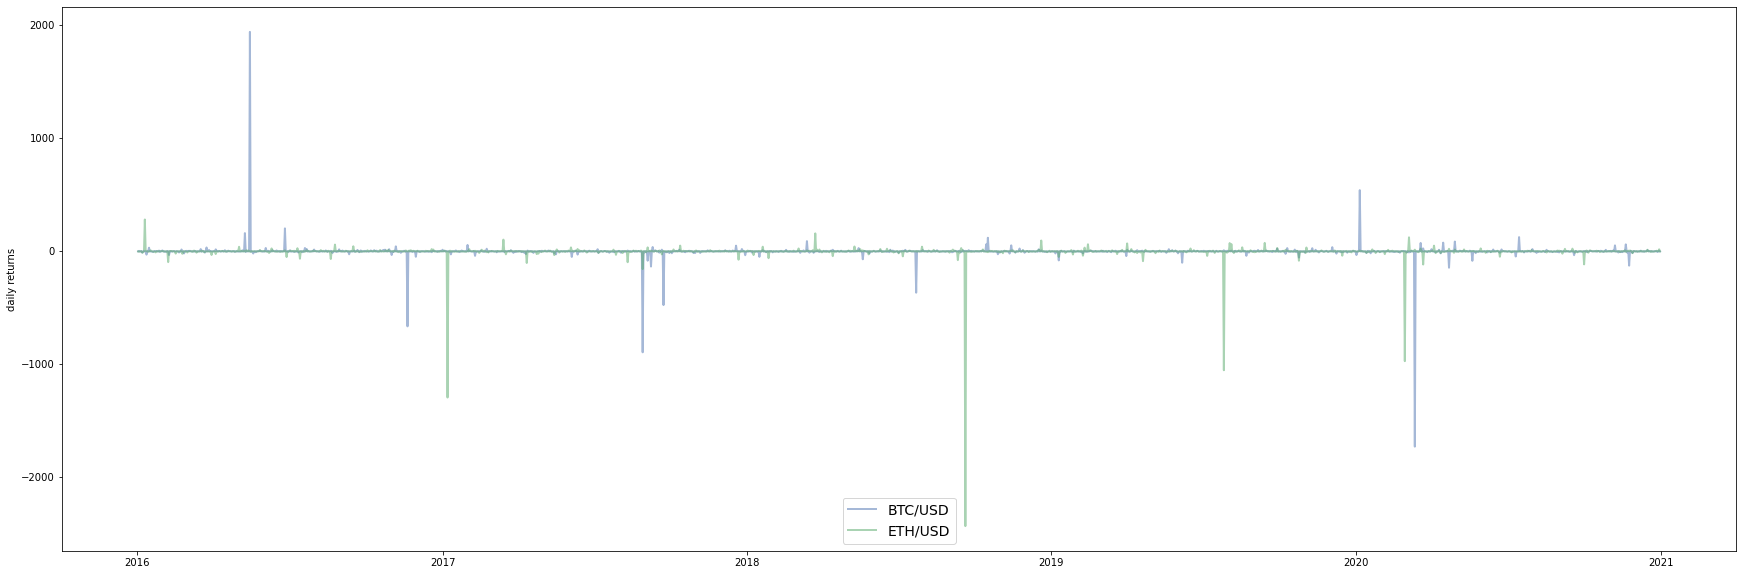

In [64]:
plt.figure(figsize=(30, 10))
for i in crypto_returns.columns.values:
    plt.plot(crypto_returns.index, crypto_returns[i], lw=2, alpha=0.5,label=i)
plt.legend(loc='lower center', fontsize=14)
plt.ylabel('daily returns')

In [65]:
#Calculate means
crypto_means = crypto_df.mean()
crypto_means

BTC/USD    0.003088
ETH/USD    0.005406
dtype: float64

In [66]:
#Calculate Standard Deviation
crypto_std = crypto_df.std()
crypto_std

BTC/USD    0.039192
ETH/USD    0.059320
dtype: float64

In [67]:
#Calculate Covariance Matrix
crypto_cov_matrix = crypto_returns.cov()
crypto_cov_matrix

,BTC/USD,ETH/USD
BTC/USD,4922.214993,54.625297
ETH/USD,54.625297,5487.347739


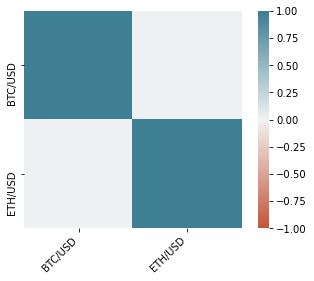

In [68]:
# Plot the correlation heatmap
crypto_corr = crypto_returns.corr()
ax = sns.heatmap(
    crypto_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [69]:
## Applying Markowitz Portfolio Theory (MPT) with Efficient Frontier

In [70]:
# Number of portfolios to simulate
num_portfolios = 10000
# Risk free rate (used for Sharpe ratio below)
# anchored on treasury bond rates (US 10-year Treasury Bond Yield)
risk_free_rate = 0.0169

In [71]:
def generate_random_portfolios(num_portfolios, crypto_means, crypto_cov_matrix, risk_free_rate):
    # Initialize array of shape 3 x N to store our results, 
    # where N is the number of portfolios we're going to simulate
    results = np.zeros((3,num_portfolios))
    # Array to store the weights of each equity
    weight_array = []
    for i in range(num_portfolios):
        # Randomly assign floats to our n equities
        weights = np.random.random(2)
        # Convert the randomized floats to percentages (summing to 100)
        weights /= np.sum(weights)
        # Add to our portfolio weight array
        weight_array.append(weights)
        # Pull the standard deviation, returns from our function above using 
        # the weights, mean returns generated in this function
        portfolio_std_dev, portfolio_return = portfolio_annualized_performance(weights, crypto_means, crypto_cov_matrix)
        # Store output
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        # Sharpe ratio
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weight_array

----------------------------------------------------------------------------------------------------
Portfolio at maximum Sharpe Ratio

--Returns, volatility--

Annualized Return: 1.14
Annualized Volatility: 845.02


--Allocation at max Sharpe ratio--

            BTC/USD  ETH/USD
allocation    38.41    61.59
----------------------------------------------------------------------------------------------------


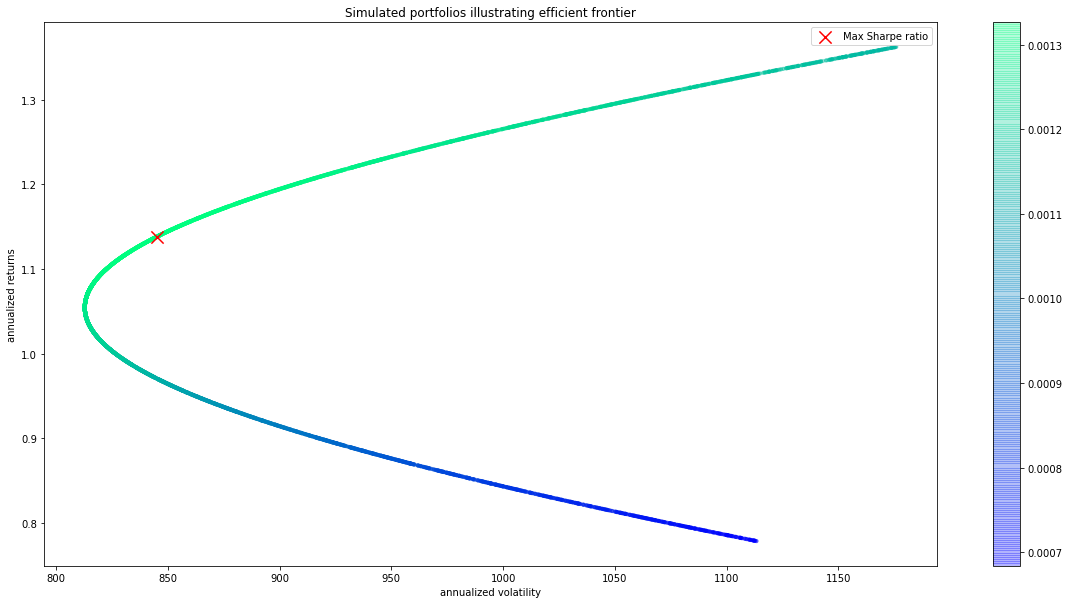

In [72]:
def display_simulated_portfolios(crypto_means, crypto_cov_matrix, num_portfolios, risk_free_rate):

    # pull results, weights from random portfolios
    results, weights = generate_random_portfolios(num_portfolios, crypto_means, crypto_cov_matrix, risk_free_rate)
    
    # pull the max portfolio Sharpe ratio (3rd element in results array from 
    # generate_random_portfolios function)
    max_sharpe_idx = np.argmax(results[2])

    # pull the associated standard deviation, annualized return w/ the max Sharpe ratio
    stdev_portfolio, returns_portfolio = results[0,max_sharpe_idx], results[1,max_sharpe_idx]

    # pull the allocation associated with max Sharpe ratio
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=crypto_df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    print("-"*100)
    print("Portfolio at maximum Sharpe Ratio\n")
    print("--Returns, volatility--\n")
    print("Annualized Return:", round(returns_portfolio,2))
    print("Annualized Volatility:", round(stdev_portfolio,2))
    
    print("\n")
    print("--Allocation at max Sharpe ratio--\n")
    print(max_sharpe_allocation)
    print("-"*100)
    
    plt.figure(figsize=(20, 10))
    # x = volatility, y = annualized return, color mapping = sharpe ratio
    plt.scatter(results[0,:],results[1,:],c=results[2,:], cmap='winter', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    # Mark the portfolio w/ max Sharpe ratio
    plt.scatter(stdev_portfolio, returns_portfolio, marker='x',color='r',s=150, label='Max Sharpe ratio')
    plt.title('Simulated portfolios illustrating efficient frontier')
    plt.xlabel('annualized volatility')
    plt.ylabel('annualized returns')
    plt.legend(labelspacing=1.2)

display_simulated_portfolios(crypto_means, crypto_cov_matrix, num_portfolios, risk_free_rate)

In [73]:
#   So what is happening to this formula? 
#   Before we dive in, we need to understand the concept of max Sharpe Ratio: 
##  The ratio is commonly used as a means of calculating the performance of an investment after 
##  adjusting for its risk that allows investments of different risk profiles to be compared against each other.
##  Max Sharpe Ratio means that investor will choose to go with higher risk, as in this case is Bitcoin, to achieve higher return
##  The volatility gap between Bitcoin and Ethereum is significantly difference with Bitcoin volatility level is over the cloud, 
##  therefore we can see why this model choose to go all-in in Bitcoin instead of allocating a *meaningful portion* to Ethereum
##  


# Output Graphs

## Total Returns

27266.825948263606
37708.009415542125
12453.828352970158


<AxesSubplot:title={'center':'Final return after 10 years comparison'}, ylabel='Return in Dollars'>

<Figure size 432x288 with 0 Axes>

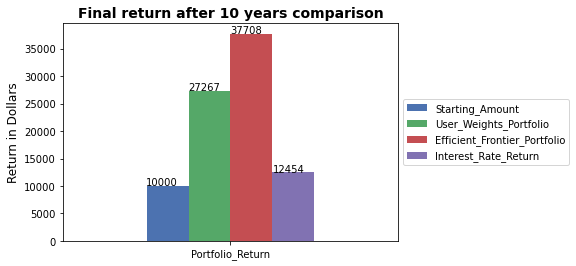

In [74]:
# Based on user input
#investment_worth.head()
print(final_investment_worth)

# Efficient Frontier
#investment_worth_p2.head()
print(p2_investment_worth)

# Interest rate average return
print(Mean_Principal_plus_Interest)

#create dataframe for plot
total_return_data = {'Starting_Amount':[round(investment_amount,)],
                    'User_Weights_Portfolio':[round(final_investment_worth,)],
                    'Efficient_Frontier_Portfolio':[round(p2_investment_worth,)],
                    'Interest_Rate_Return':[round(Mean_Principal_plus_Interest,)],
                    'Index_Column':['Portfolio_Return']
                    }

total_return_df = pd.DataFrame(total_return_data)
total_return_df.set_index('Index_Column',inplace=True)

#generate plot
total_return_plot = plt.figure()
total_return_plot = total_return_df.plot.bar(rot=0)
total_return_plot.set_xlabel("")
total_return_plot.set_ylabel("Return in Dollars", fontsize=12)
total_return_plot.set_title(
    "Final return after 10 years comparison", fontsize=14, fontweight="bold"
)
total_return_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for p in total_return_plot.patches:
    total_return_plot.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
total_return_plot



## Returns over time

<AxesSubplot:title={'center':'Investment worth over 10 years'}, ylabel='Investment Worth'>

<Figure size 432x288 with 0 Axes>

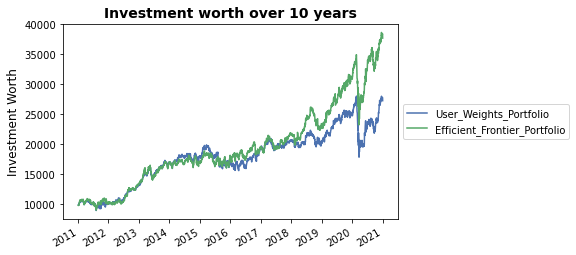

In [75]:
# Based on user input
#investment_worth.head()

# Efficient Frontier
#investment_worth_p2.head()

# Interest rate average return
#require returns by date/ month

#create dataframe for plot
columns_total_return = ['User_Weights_Portfolio','Efficient_Frontier_Portfolio']

total_return_data_period = pd.concat([investment_worth,investment_worth_p2
                      ], axis="columns", join="inner")

#create plot
total_return_data_period.rename({0 : 'User_Weights_Portfolio', 1 : 'Efficient_Frontier_Portfolio'}, axis=1, inplace=True)
total_return_period_plot = plt.figure()
total_return_period_plot = total_return_data_period.plot.line()
total_return_period_plot.set_xlabel("")
total_return_period_plot.set_ylabel("Investment Worth", fontsize=12)
total_return_period_plot.set_title(
    "Investment worth over 10 years", fontsize=14, fontweight="bold"
)
total_return_period_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
total_return_period_plot

## Weighting Comparison

<AxesSubplot:title={'center':'User Weighting vs Efficient Frontier Weighting of Stocks'}, xlabel='Stocks', ylabel='% Weighting'>

<Figure size 432x288 with 0 Axes>

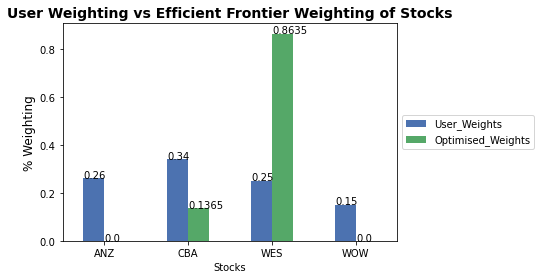

In [76]:

#for loops to obtain weights from dictionary
user_weights_list = []
for curr in user_weights:
    if curr != 0:
        user_weights_list.append(curr)

user_stocks = []
for name in stock_name:
    if len(name) != 0:
        user_stocks.append(name)
        
#user_stocks
weights_optimised_list

weighting_data = {'User_Weights' : user_weights_list,
                  'Optimised_Weights' : weights_optimised_list    
                }

weighting_df = pd.DataFrame(weighting_data, index = user_stocks)

#plot

weighting_plot = plt.figure()
weighting_plot = weighting_df.plot.bar(rot=0)
weighting_plot.set_xlabel("Stocks")
weighting_plot.set_ylabel("% Weighting", fontsize=12)
weighting_plot.set_title(
    "User Weighting vs Efficient Frontier Weighting of Stocks", fontsize=14, fontweight="bold"
)
weighting_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for p in weighting_plot.patches:
    weighting_plot.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
weighting_plot

In [142]:
## Interest Rate Graph

Text(0.5, 1.0, 'RBA Interest Rates over last 10-years')

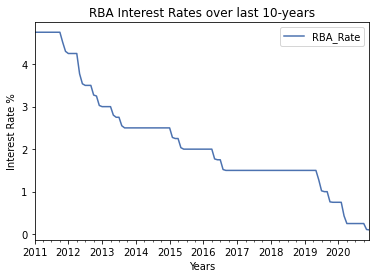

In [77]:
interest_rate_plot = month_by_month_cashrate_df.plot()
interest_rate_plot.set_ylabel("Interest Rate %")
interest_rate_plot.set_xlabel("Years")
interest_rate_plot.set_title('RBA Interest Rates over last 10-years')